In [2]:
# Import libraries
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

In [3]:
# Set view options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)

In [4]:
# Read in slurm, ce5/ce6 time series data
slurm = pd.read_csv('../data/slurm_time_series.csv', index_col = 'TIMESTAMP', parse_dates = True)
ce5_ce6 = pd.read_csv('../data/ce5_ce6_time_series.csv', index_col = 'TIMESTAMP', parse_dates = True)

In [13]:
# Perform 1 hour resample and 7 day rolling window on slurm time series data
agg_dict = {'STARTEDJOBS': 'sum',
            'RUNNINGJOBS': 'mean',
            'ENDEDJOBS': 'sum',
            'REQMEMTOT': 'mean',
            'USEDMEM': 'mean',
            'NODES': 'mean',
            'CPUS': 'mean',
}

slurm_1_hour_resample = slurm.resample('1H').agg(agg_dict)
slurm_1_hour_resample_7day_rolling = slurm_1_hour_resample.rolling('7D').agg(agg_dict)

In [5]:
# Perform 1 hour resample and 7 day rolling window on ce5/ce6 time series data
ce5_ce6_1_hour_resample = ce5_ce6.resample('1H').sum()
ce5_ce6_1_hour_resample_7day_rolling = ce5_ce6_1_hour_resample.rolling('7D').sum()

In [6]:
# Show color palette
sns.color_palette('Paired')

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

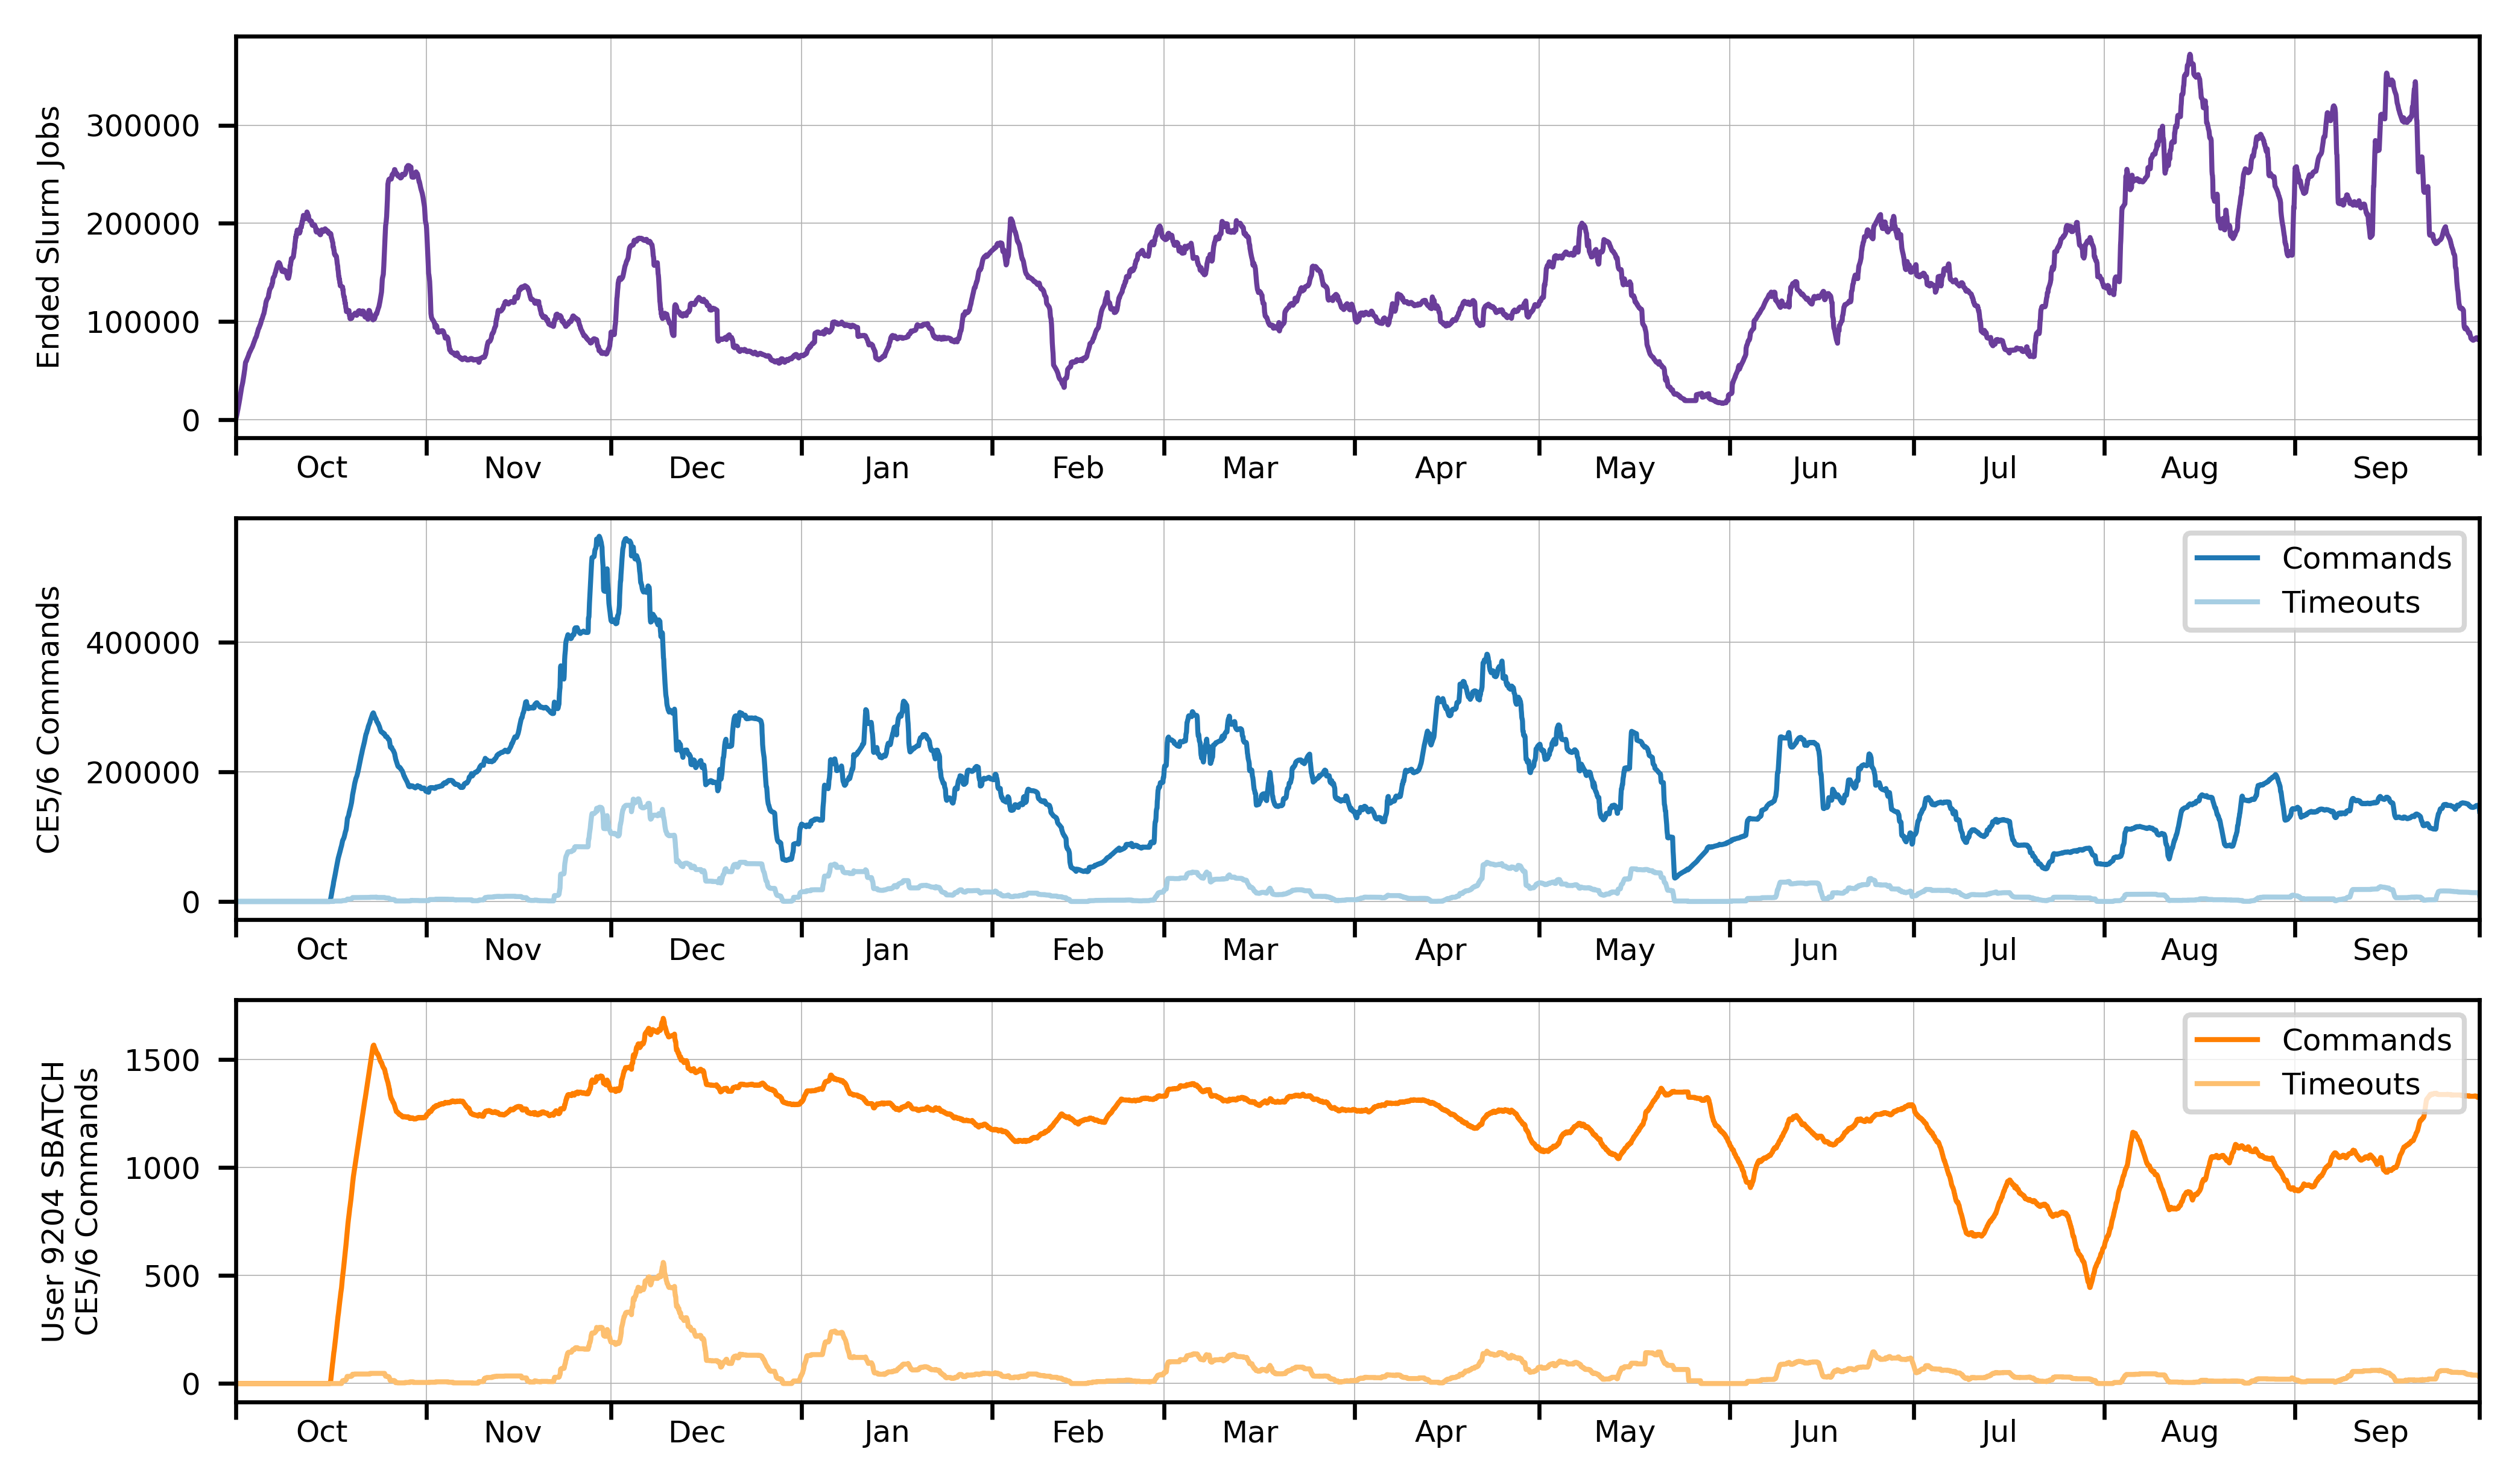

In [7]:
# Plot ended jobs, all commands/timeouts, and user 9204 sbatch commands/timeouts
fig, axs = plt.subplots(3, 1, figsize = (8, 5), dpi = 600)

purple_palette = [sns.color_palette('Paired')[9], sns.color_palette('Paired')[8]]
blue_palette = [sns.color_palette('Paired')[1], sns.color_palette('Paired')[0]]
orange_palette = [sns.color_palette('Paired')[7], sns.color_palette('Paired')[6]]

sns.lineplot(x = slurm_1_hour_resample_7day_rolling.index, 
             y = 'ENDEDJOBS', 
             data = slurm_1_hour_resample_7day_rolling, 
             linewidth = 1, 
             color = purple_palette[0], 
             ax = axs[0]
)

sns.lineplot(x = ce5_ce6_1_hour_resample_7day_rolling.index, 
             y = 'COMMANDS', 
             data = ce5_ce6_1_hour_resample_7day_rolling, 
             linewidth = 1, 
             color = blue_palette[0], 
             ax = axs[1]
)

sns.lineplot(x = ce5_ce6_1_hour_resample_7day_rolling.index, 
             y = 'TIMEOUTS', 
             data = ce5_ce6_1_hour_resample_7day_rolling, 
             linewidth = 1, 
             color = blue_palette[1], 
             ax = axs[1]
)

sns.lineplot(x = ce5_ce6_1_hour_resample_7day_rolling.index, 
             y = 'USER_9204_SBATCH_COMMANDS', 
             data = ce5_ce6_1_hour_resample_7day_rolling, 
             linewidth = 1, 
             color = orange_palette[0], 
             ax = axs[2]
)

sns.lineplot(x = ce5_ce6_1_hour_resample_7day_rolling.index, 
             y = 'USER_9204_SBATCH_TIMEOUTS', 
             data = ce5_ce6_1_hour_resample_7day_rolling, 
             linewidth = 1, 
             color = orange_palette[1], 
             ax = axs[2]
)

axs[0].set_ylabel('Ended Slurm Jobs')
axs[1].set_ylabel('CE5/6 Commands')
axs[2].set_ylabel('User 9204 SBATCH\nCE5/6 Commands')

axs[1].legend(title = '', labels = ['Commands', 'Timeouts'], fontsize = 6, loc = 'upper right')
axs[2].legend(title = '', labels = ['Commands', 'Timeouts'], fontsize = 6, loc = 'upper right')

[ax.set_xlabel('') for ax in axs]
[ax.yaxis.label.set_size(6) for ax in axs]
[ax.xaxis.set_major_locator(mdates.MonthLocator()) for ax in axs]
[ax.xaxis.set_major_formatter(ticker.NullFormatter()) for ax in axs]
[ax.xaxis.set_minor_locator(mdates.DayLocator(bymonthday = 15)) for ax in axs]
[ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b')) for ax in axs]
[ax.set_xlim([datetime.date(2020, 10, 1), datetime.date(2021, 10, 1)]) for ax in axs]
[ax.tick_params(which = 'major', labelsize = 6) for ax in axs]
[ax.tick_params(which = 'minor', length = 0, labelsize = 6) for ax in axs]
[ax.grid(linewidth = 0.2) for ax in axs]

plt.show()

In [31]:
# Create hour and day of week columns
slurm_1_hour_resample['hour'] = slurm_1_hour_resample.index.hour
slurm_1_hour_resample['day_of_week'] = slurm_1_hour_resample.index.day_of_week

#  Calculate average ended jobs per hour and day of week
ended_jobs_per_hour_by_day_of_week = slurm_1_hour_resample.groupby(['hour', 'day_of_week'], as_index = False).agg('mean')

# Assign ended jobs at hour 0 to hour 24 to make line plot look connected
jobs_ended_hour_0 = ended_jobs_per_hour_by_day_of_week.loc[ended_jobs_per_hour_by_day_of_week['hour'] == 0]
ended_jobs_per_hour_by_day_of_week = ended_jobs_per_hour_by_day_of_week.append(jobs_ended_hour_0.assign(hour = 24))
ended_jobs_per_hour_by_day_of_week = ended_jobs_per_hour_by_day_of_week.reset_index(drop = True)

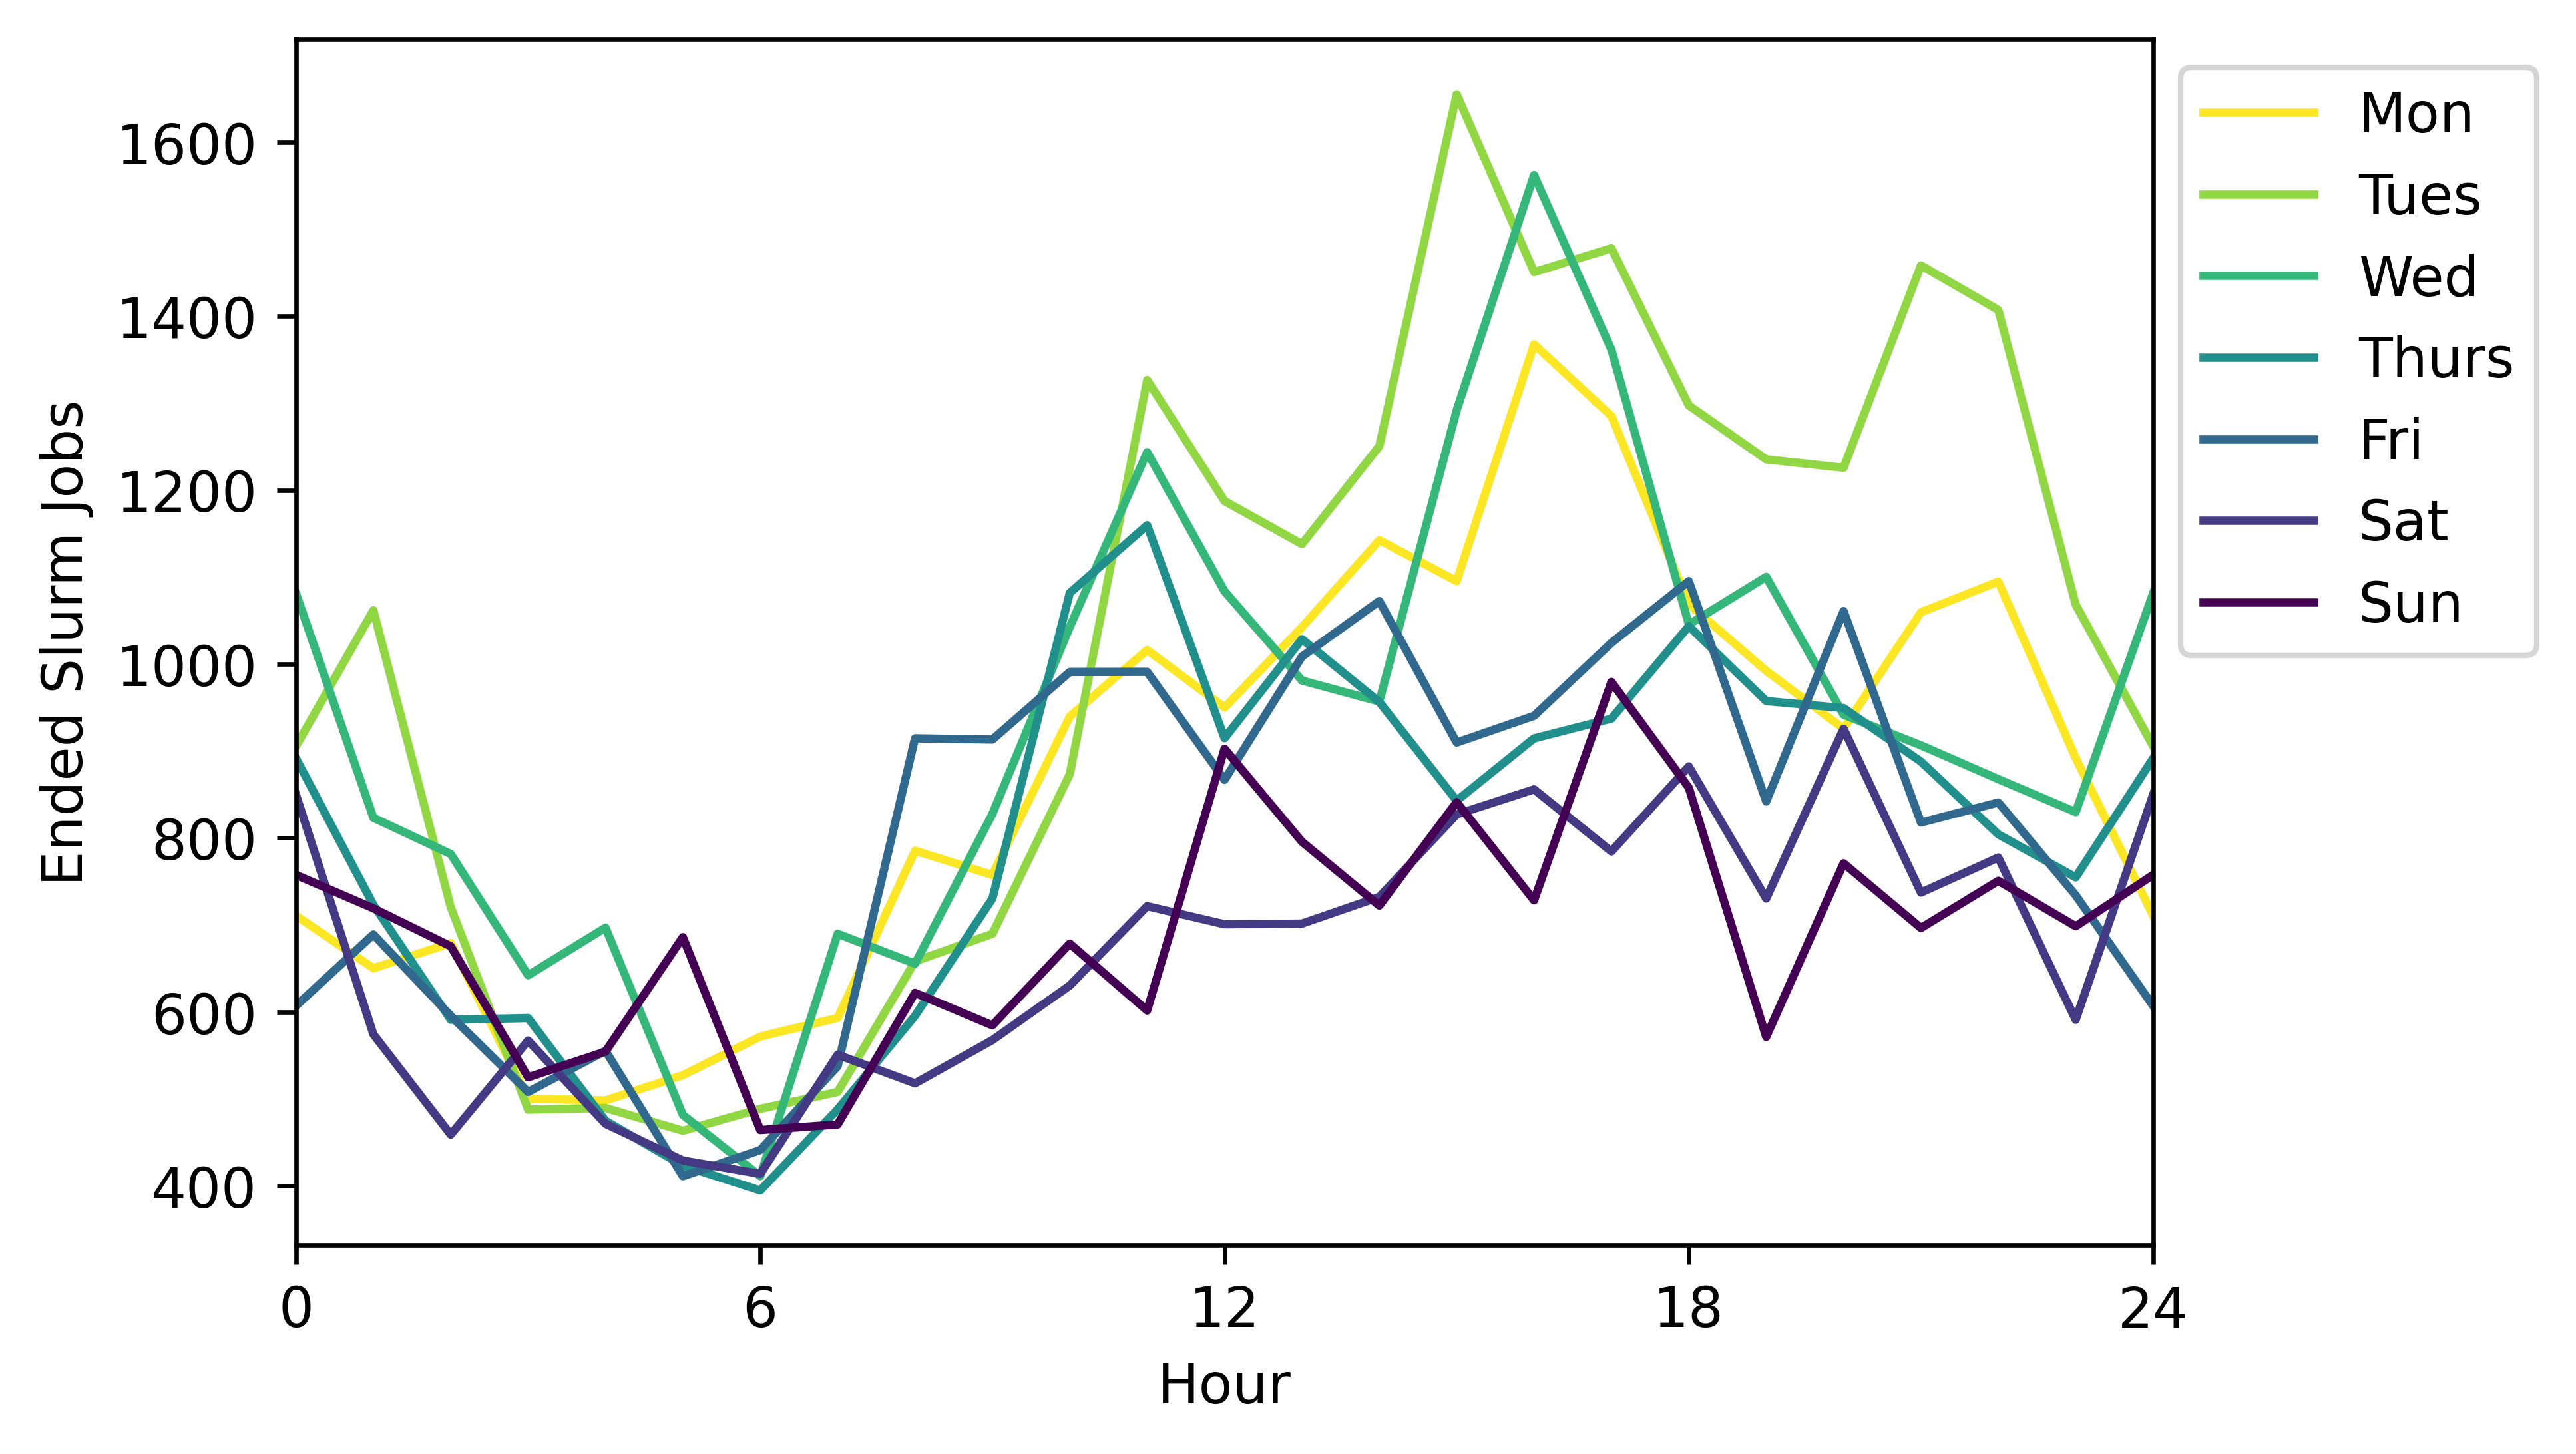

In [30]:
# Plot average ended jobs per hour by day of week
fig, ax = plt.subplots(figsize = (6, 4), dpi = 600)

sns.lineplot(x = 'hour',
             y = 'ENDEDJOBS',
             data = ended_jobs_per_hour_by_day_of_week,
             hue = 'day_of_week',
             palette = 'viridis_r')

ax.set_xlim([0, 24])
ax.set_xticks([0, 6, 12, 18, 24])
ax.set_xlabel('Hour')
ax.set_ylabel('Ended Slurm Jobs')
ax.legend(title = '', labels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], bbox_to_anchor = (1, 1))

plt.show()